In [1]:
import pandas as pd
from tqdm import tqdm_notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
file_list = []
for i in range(1,31):
    filename = "geoEurope_202206{}.tsv"
    if i < 10:
        day = '0'+str(i)
    else:
        day = str(i)
    file_list.append(filename.format(day))

In [41]:
data = pd.read_csv("geoEurope_20220601.tsv", sep='\t',low_memory=False,lineterminator="\n")

In [42]:
data.head()

,id,user_id,user_name,time,time_day,time_hour,location,country,content,mention_id,mention_name,reply_id
0,1531772510450208769,127625257,valerievalentin,2022-06-01 00:00:00:105,1,0,NaN,Royaume-Uni,https://t.co/B3K8DCQpXg,NaN,NaN,NaN
1,1531772510701748225,1092190045,rh_neukoelln,2022-06-01 00:00:00:165,1,0,"[52.481388, 13.435]",NaN,au weia! eens! bäm,NaN,NaN,NaN
2,1531772513306525696,28993079,mosb45,2022-06-01 00:00:00:786,1,0,NaN,Türkiye,@nurse_hmsre Hayır akepe yi aya gönder mek,['1473087969829568516'],['nurse_hmsre'],1.473088e+18
3,1531772513809842176,867134762,dangobb,2022-06-01 00:00:00:906,1,0,NaN,Italia,@gigi52335676 Ci riprenderemo le colonie e anc...,['4185660388'],['gigi52335676'],4.185660e+09
4,1531772514262831104,635624391,MrRichi94,2022-06-01 00:00:01:14,1,0,NaN,España,"@rompelavabos No me consta, eso qué es? 😂😂😂 ht...",['902638832675430400'],['rompelavabos'],9.026388e+17


In [3]:
df_list = []
for inputfile in file_list:
    print("Reading file:",inputfile)
    new_df = pd.read_csv(inputfile, sep='\t',low_memory=False, lineterminator="\n")
    df_list.append(new_df)

Reading file: geoEurope_20220601.tsv
Reading file: geoEurope_20220602.tsv
Reading file: geoEurope_20220603.tsv
Reading file: geoEurope_20220604.tsv
Reading file: geoEurope_20220605.tsv
Reading file: geoEurope_20220606.tsv
Reading file: geoEurope_20220607.tsv
Reading file: geoEurope_20220608.tsv
Reading file: geoEurope_20220609.tsv
Reading file: geoEurope_20220610.tsv
Reading file: geoEurope_20220611.tsv
Reading file: geoEurope_20220612.tsv
Reading file: geoEurope_20220613.tsv
Reading file: geoEurope_20220614.tsv
Reading file: geoEurope_20220615.tsv
Reading file: geoEurope_20220616.tsv
Reading file: geoEurope_20220617.tsv
Reading file: geoEurope_20220618.tsv
Reading file: geoEurope_20220619.tsv
Reading file: geoEurope_20220620.tsv
Reading file: geoEurope_20220621.tsv
Reading file: geoEurope_20220622.tsv
Reading file: geoEurope_20220623.tsv
Reading file: geoEurope_20220624.tsv
Reading file: geoEurope_20220625.tsv
Reading file: geoEurope_20220626.tsv
Reading file: geoEurope_20220627.tsv
R

In [173]:
df_list[5].head(50)

,id,user_id,user_name,time,time_day,time_hour,location,country,content,mention_id,mention_name,reply_id
0,1533584449601949698,1322937656,fentyspirit,2022-06-06 00:00:00:63,6,0,NaN,France,Grvvvv💀,NaN,NaN,NaN
1,1533584449945862150,1092190045,rh_neukoelln,2022-06-06 00:00:00:145,6,0,"[52.481388, 13.435]",NaN,ächz,NaN,NaN,NaN
2,1533584453343354883,2858863684,sulsitodisimone,2022-06-06 00:00:00:955,6,0,"[44.4975, 8.98777778]",Italia,"01:00 Temp. 19,1°C App. 22,3°C Umid. 99% P...",NaN,NaN,NaN
3,1533584454165348361,2446939723,bc93b281fc51477,2022-06-06 00:00:01:151,6,0,"[43.51581714, 7.04953194]",France,#biddinggoodbye to this #beauty #island #islan...,NaN,NaN,NaN
4,1533584455608172547,1178504995,rbpi_bot,2022-06-06 00:00:01:495,6,0,NaN,France,I started 31 days 10 hours and 5 minutes ago. ...,NaN,NaN,NaN
5,1533584454811369473,1454313841559486464,MHMohammi94,2022-06-06 00:00:01:305,6,0,NaN,Islamic Republic of Iran,@1fazix @mahsa_19977 بله آقایون هم غم دارن 🌸🌸...,"['1517245201881964545', '1361266909463871496']","['1fazix', 'mahsa_19977']",1.517245e+18
6,1533584457256542209,116223448,itsJamieDrfc96,2022-06-06 00:00:01:888,6,0,NaN,United Kingdom,Here we go #HIAC kick off,NaN,NaN,NaN
7,1533584457395056642,1384110594,HoraCatalana,2022-06-06 00:00:01:921,6,0,"[41.545639, 1.893817]",Espanya,És la una en punt de la nit,NaN,NaN,NaN
8,1533584457416024067,584661634,TorreRellotge,2022-06-06 00:00:01:926,6,0,"[41.545639, 1.893817]",Espanya,ding ding ding ding DONG!,NaN,NaN,NaN
9,1533584457650905090,391461834,DMarkLauder,2022-06-06 00:00:01:982,6,0,NaN,United Kingdom,👏👏👏🎾🏆,NaN,NaN,NaN


In [4]:
day_dict = {}
hour_dict = {}

In [10]:
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    day_dict[i]=len(df_list[i])
    hours = list(df_list[i]['time_hour'])
    for j in hours:
        if j not in hour_dict:
            hour_dict[j]=1
        else:
            hour_dict[j]+=1
    

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

## Basic stats

In [65]:
np.sum(list(day_dict.values()))

14368836

Text(0, 0.5, 'Number')

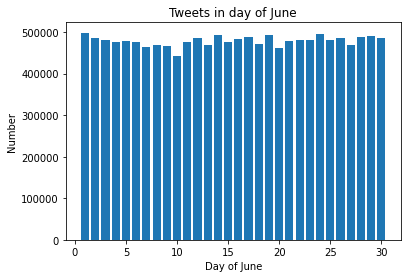

In [11]:
plt.bar([x+1 for x in day_dict.keys()],day_dict.values())
plt.title("Tweets in day of June")
plt.xlabel('Day of June')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

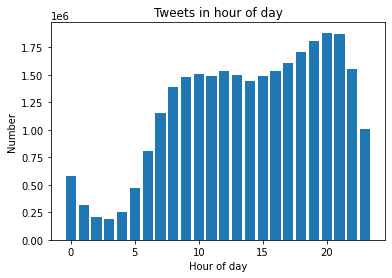

In [12]:
plt.bar(hour_dict.keys(),hour_dict.values())
plt.title("Tweets in hour of day")
plt.xlabel('Hour of day')
plt.ylabel('Number')

In [7]:
weekend_june = [4,5,11,12,18,19,25,26]

In [13]:
weekend_dict = {}
workday_dict = {}
for i in day_dict.keys():
    if i-1 in weekend_june:
        weekend_dict[i] = day_dict[i]
    else:
        workday_dict[i] = day_dict[i]

([<matplotlib.axis.XTick at 0x7f5918a33790>,
 [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

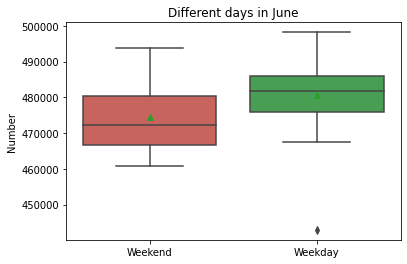

In [14]:
sns.boxplot(
    data=[list(weekend_dict.values()), list(workday_dict.values())],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
).set(
    ylabel='Number'
)
plt.title("Different days in June")
plt.xticks([0,1], ['Weekend','Weekday'])

In [26]:
week_day_hour = {}
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    if i+1 in weekend_june:
        print("Skip")
        continue
    hours = list(df_list[i]['time_hour'])
    for j in hours:
        if j not in week_day_hour:
            week_day_hour[j]=1
        else:
            week_day_hour[j]+=1
    

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


Text(0, 0.5, 'Number')

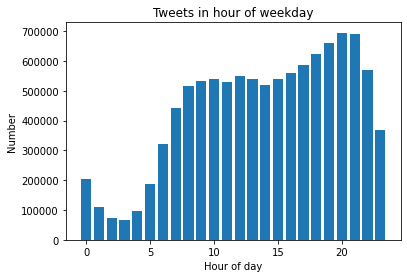

In [28]:
plt.bar(week_day_hour.keys(),week_day_hour.values())
plt.title("Tweets in hour of weekday")
plt.xlabel('Hour of day')
plt.ylabel('Number')

## Users

In [30]:
user_dict = {}
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    
    users = list(df_list[i]['user_name'])
    for i in users:
        if i not in user_dict:
            user_dict[i]=1
        else:
            user_dict[i]+=1

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [31]:
user_dict = sorted(user_dict.items(), key=lambda x:x[1], reverse=True)

In [32]:
user_value = [x[1] for x in user_dict]

(array([7.26388e+05, 1.18330e+04, 3.88000e+03, 1.69000e+03, 9.32000e+02,
        5.78000e+02, 3.54000e+02, 2.32000e+02, 1.85000e+02, 1.35000e+02,
        8.60000e+01, 6.30000e+01, 7.40000e+01, 3.80000e+01, 3.90000e+01,
        2.50000e+01, 2.20000e+01, 2.50000e+01, 1.70000e+01, 1.10000e+01,
        1.20000e+01, 7.00000e+00, 7.00000e+00, 4.00000e+00, 7.00000e+00,
        1.00000e+00, 4.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00,
        6.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00

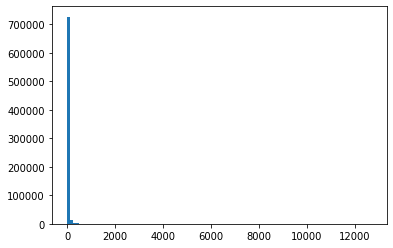

In [119]:
plt.hist(user_value,bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7feead5340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7feead58e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7feead5190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7feead5e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7feeae2190>],
 'means': []}

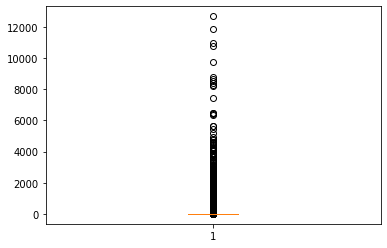

In [120]:
plt.boxplot(user_value)

In [121]:
q25, q75 = np.percentile(np.array(user_value), [25, 75])
print("75R",q75)

75R 11.0


Text(0, 0.5, 'Number of users')

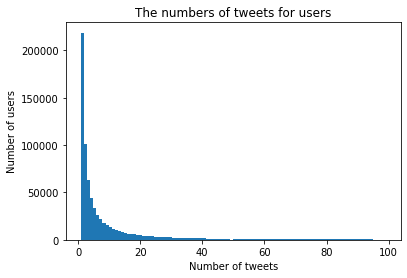

In [33]:
plt.hist([x for x in user_value if x < 100],bins=100)
plt.title("The numbers of tweets for users")
plt.xlabel('Number of tweets')
plt.ylabel('Number of users')

Text(0, 0.5, 'Number of users')

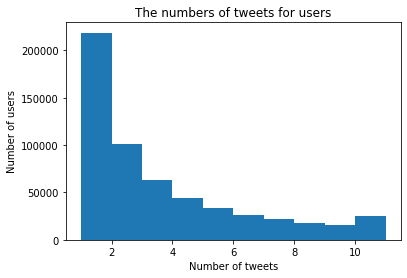

In [35]:
plt.hist([x for x in user_value if x < 12])
plt.title("The numbers of tweets for users")
plt.xlabel('Number of tweets')
plt.ylabel('Number of users')

In [106]:
user_dict[:5]

[('Kardeimcin1', 12693),
 ('DailyNews79', 11859),
 ('c_antolic', 10980),
 ('HoraCatalana', 10775),
 ('minijobanzeigen', 9752)]

In [26]:
user_id_name = {}
comment_dict = {}
mention_dict = {}

In [27]:
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i]
    user_ids = data['user_id']
    user_names = data['user_name']
    for it in range(len(data)):
        if user_ids[it] not in user_id_name:
            user_id_name[user_ids[it]]=user_names[it]

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [33]:
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i]
    mentions = list(data['mention_name'].dropna())
    for it in range(len(mentions)):
        #print(mentions[it])
        mention = ast.literal_eval(mentions[it])
        for usr in mention:
            if usr not in mention_dict:
                mention_dict[usr] = 1
            else:
                mention_dict[usr] += 1

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [37]:
for record in sorted(mention_dict.items(), key=lambda x:x[1], reverse=True)[:5]:
    print('User: {}\tNumber: {}'.format(record[0],record[1]))

User: YouTube	Number: 19822
User: RTErdogan	Number: 17162
User: BorisJohnson	Number: 15456
User: elonmusk	Number: 10075
User: GBNEWS	Number: 7547


In [39]:
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i]
    mentions = list(data['reply_id'].dropna())
    for it in range(len(mentions)):
        reply = int(mentions[it])
        if reply not in comment_dict:
            comment_dict[reply] = 1
        else:
            comment_dict[reply] += 1

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [45]:
for record in sorted(comment_dict.items(), key=lambda x:x[1], reverse=True)[:5]:
    print('UserID: {}\tNumber: {}'.format(record[0],record[1]))

UserID: 2866804900	Number: 5167
UserID: 1503799593405800448	Number: 5101
UserID: 44196397	Number: 4121
UserID: 1339166129110065152	Number: 3547
UserID: 3131144855	Number: 3356


In [50]:
user_country={}
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i][['user_name','country']].dropna()
    username = list(data['user_name'])
    country = list(data['country'])
    for it in range(len(username)):
        if username[it] not in comment_dict:
            user_country[username[it]] = country[it]

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [63]:
country_list = ['Italia','France','Spain','United Kingdom']

In [55]:
country_mention = []
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i][['country','mention_name']].dropna()
    country = list(data['country'])
    mentions = list(data['mention_name'].dropna())
    for it in range(len(mentions)):
        mention = ast.literal_eval(mentions[it])
        for usr in mention:
            if usr in user_country:
                country_mention.append((country[it],user_country[usr]))
                

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [87]:
result_country = []
for x in country_mention:
    if x[0] in country_list and x[1] in country_list: 
        result_country.append(x)

In [88]:
from collections import Counter
res_c = Counter(result_country)

In [90]:
result_country_dict = []
for i in country_list:
    result = []
    for j in country_list:
        for record in res_c.items():
            country_pair = record[0]
            number = record[1]
            if country_pair[0]==i and country_pair[1]==j:
                result.append(number)
    result_country_dict.append(result)
    

In [91]:
result_country_df = pd.DataFrame(result_country_dict,columns =country_list, index=country_list)

In [92]:
result_country_df

,Italia,France,Spain,United Kingdom
Italia,54773,667,203,1183
France,407,97180,469,4586
Spain,173,530,2279,4298
United Kingdom,851,4961,4818,302294


<AxesSubplot:>

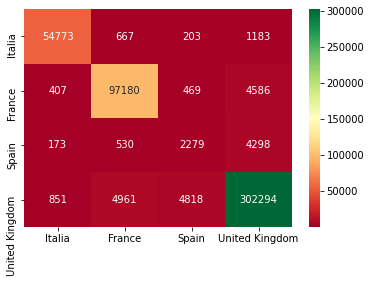

In [93]:
sns.heatmap(result_country_df,annot=True,fmt='.0f', cmap='RdYlGn')

## Mapping

In [94]:
cords = []
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i]
    user_ids = data['location'].dropna()
    for it in user_ids:
        cords.append(it)

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [95]:
len(cords)

670167

In [96]:
import math

# derived from the Java version explained here: http://wiki.openstreetmap.org/wiki/Mercator
RADIUS = 6378137.0 # in meters on the equator

def lat2y(a):
  return math.log(math.tan(math.pi / 4 + math.radians(a) / 2)) * RADIUS

def lon2x(a):
  return math.radians(a) * RADIUS

In [97]:
points = cords[:600000]
points = [ast.literal_eval(x) for x in points]
xr = [lat2y(x[0]) for x in points]
yr = [lon2x(x[1]) for x in points]

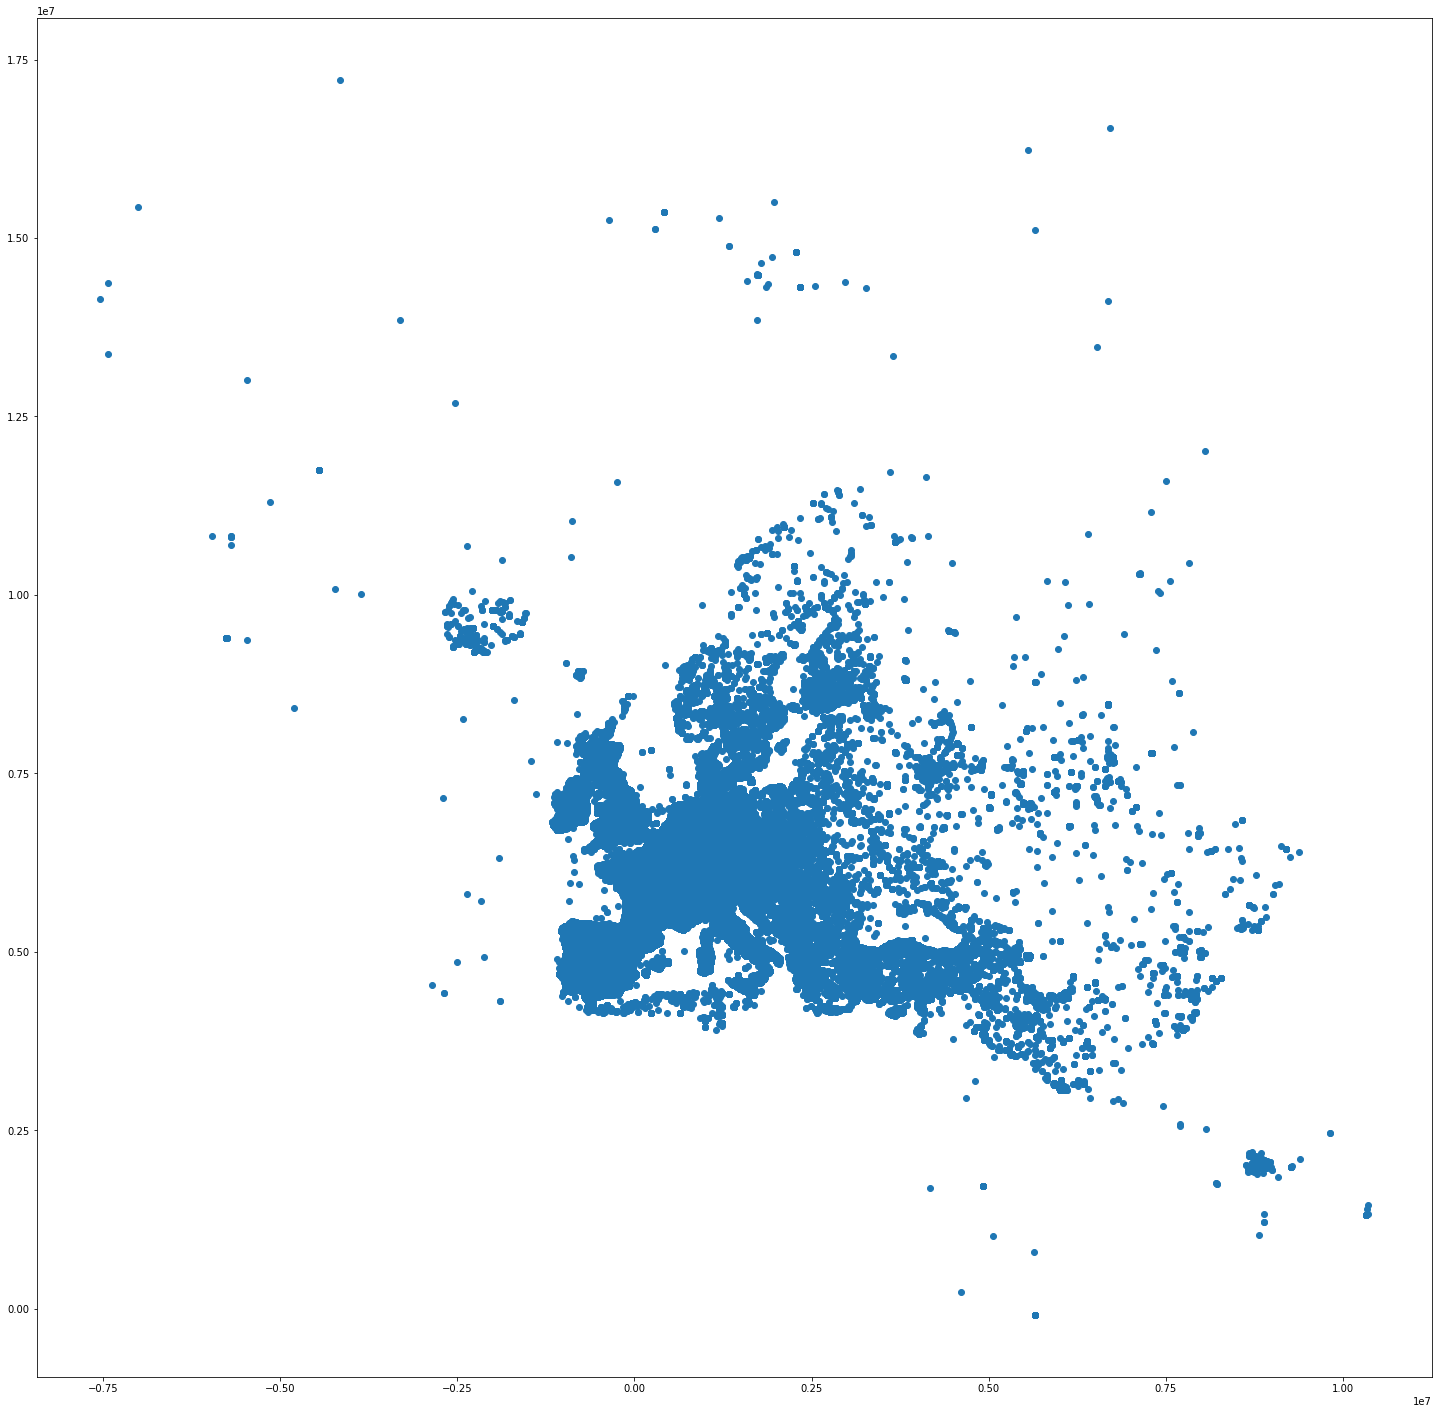

In [102]:
plt.figure(figsize=(25,25))
plt.scatter(yr, xr)


In [104]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [105]:
data_dir = "data/"
path_rg = data_dir + "NUTS_RG_01M_2021_3857.json"
gdf_rg = gpd.read_file(path_rg)
path_bn = data_dir + "NUTS_BN_01M_2021_3857_LEVL_0.json"
gdf_bn = gpd.read_file(path_bn)
path_lb = data_dir + "NUTS_LB_2021_3857_LEVL_0.json"
gdf_lb = gpd.read_file(path_lb)

In [106]:
geometry = [Point(xy) for xy in zip(yr,xr)]
geo_df = gpd.GeoDataFrame(geometry = geometry)

In [77]:
geo_df

,geometry
0,POINT (1495577.359 6887639.012)
1,POINT (1000514.846 5542757.028)
2,POINT (3397980.025 6524726.241)
3,POINT (2675156.850 6418924.854)
4,POINT (210818.744 5093159.500)
...,...
59995,POINT (-11020.630 6712901.859)
59996,POINT (-37167.505 6698893.385)
59997,POINT (-254627.816 7067936.244)
59998,POINT (1394404.130 5694926.778)


<AxesSubplot:>

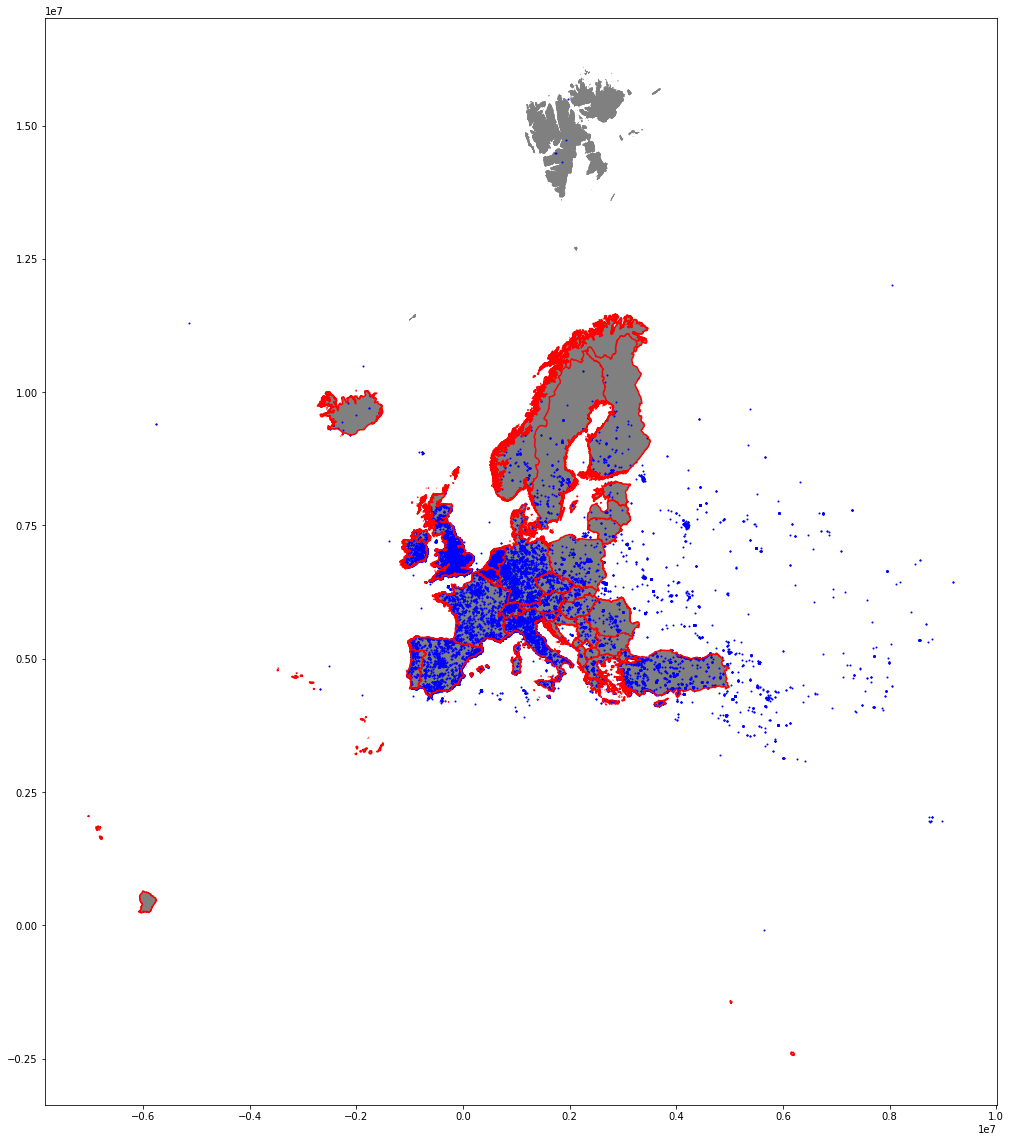

In [81]:
ax = gdf_rg.plot(figsize=(30,20), color="gray")
gdf_bn.plot(figsize=(20,15), ax=ax, color="red")
geo_df.plot(ax = ax, markersize = 1, color = 'blue')
#gdf_lb.plot(figsize=(20,15), ax=ax, color="yellow")

In [123]:
path = data_dir + "NUTS_RG_01M_2021_3857_LEVL_1.json"
gdf = gpd.read_file(path)
gdf.crs = "EPSG:3857"
gdf_fr = gdf[gdf.CNTR_CODE == "UK"]

In [124]:
cords_fr = []
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data = df_list[i][['country','location']].dropna()
    country = list(data['country'])
    location = list(data['location'])
    for it in range(len(country)):
        if country[it]=='United Kingdom' and :
            cords_fr.append(location[it])

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

In [129]:
points_0 = [ast.literal_eval(x) for x in cords_fr]
points_fr = []
for p in points_0:
    if p[1]<5:
        points_fr.append(p)
        
xr_fr = [lat2y(x[0]) for x in points_fr]
yr_fr = [lon2x(x[1]) for x in points_fr]
geometry_fr = [Point(xy) for xy in zip(yr_fr,xr_fr)]
geo_fr = gpd.GeoDataFrame(geometry = geometry_fr)

<AxesSubplot:>

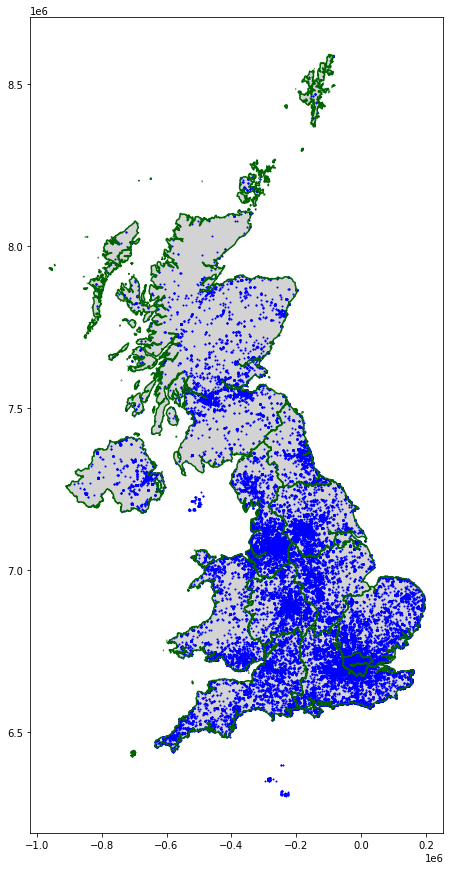

In [130]:
gdf_fr = gdf_fr.to_crs("EPSG:3857")
ax = gdf_fr.plot(figsize=(20,15), color="lightgray")
geo_fr.plot(ax = ax, markersize = 1, color = 'blue')
# plot borders between the states green
gdf_fr.boundary.plot(color="darkgreen", ax=ax)


## Events

In [10]:
UK_dict = {}
UK_tweets = []
FR_dict = {}
FR_tweets = []
TK_dict = {}
TK_tweets = []

In [11]:
for i in tqdm_notebook(range(len(df_list)),desc='Reading：'):
    data_uk = df_list[i]
    data_uk = data_uk[data_uk['country']=='United Kingdom']
    data_fr = df_list[i]
    data_fr = data_fr[data_fr['country']=='France']
    data_tk = df_list[i]
    data_tk = data_tk[data_tk['country']=='Turkey']
    UK_dict[i] = len(data_uk)
    FR_dict[i] = len(data_fr)
    TK_dict[i] = len(data_tk)
    UK_tweets.append(data_uk['content'])
    FR_tweets.append(data_fr['content'])
    TK_tweets.append(data_tk['content'])
    
    

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Reading：:   0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Number')

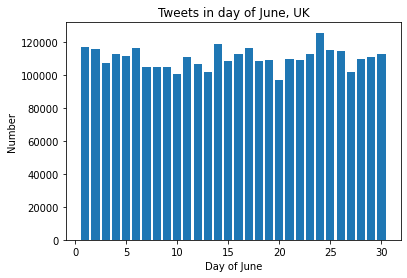

In [12]:
plt.bar([x+1 for x in UK_dict.keys()],UK_dict.values())
plt.title("Tweets in day of June, UK")
plt.xlabel('Day of June')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

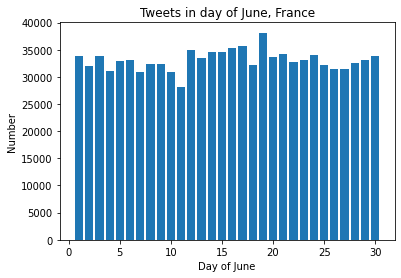

In [13]:
plt.bar([x+1 for x in FR_dict.keys()],FR_dict.values())
plt.title("Tweets in day of June, France")
plt.xlabel('Day of June')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

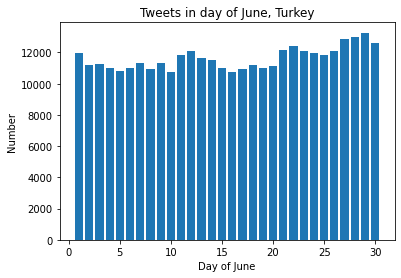

In [14]:
plt.bar([x+1 for x in TK_dict.keys()],TK_dict.values())
plt.title("Tweets in day of June, Turkey")
plt.xlabel('Day of June')
plt.ylabel('Number')

Text(0.5, 1.0, 'UK tweets in June')

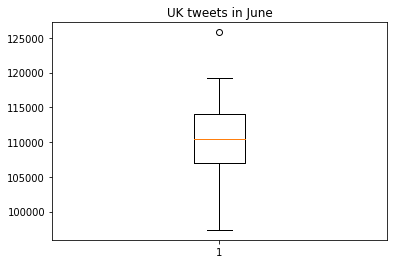

In [15]:
plt.boxplot(list(UK_dict.values()))
plt.title("UK tweets in June")

Text(0.5, 1.0, 'France tweets in June')

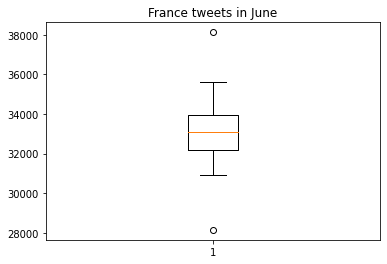

In [16]:
plt.boxplot(list(FR_dict.values()))
plt.title("France tweets in June")

Text(0.5, 1.0, 'Turkey tweets in June')

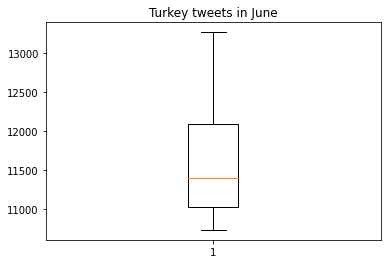

In [17]:
plt.boxplot(list(TK_dict.values()))
plt.title("Turkey tweets in June")

In [18]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('com')
stopwords.add('t.co')
stopwords.add('co')
stopwords.add('t')

def generate_word_cloud(text):
    comment_words = ''
    for val in text:
        val = str(val)
        tokens = val.split()
        new_tokens = []
        for i in range(len(tokens)):
            if len(tokens[i])<4:
                continue
            new_tokens.append(tokens[i].lower())
     
        comment_words += " ".join(new_tokens)+" "
        
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

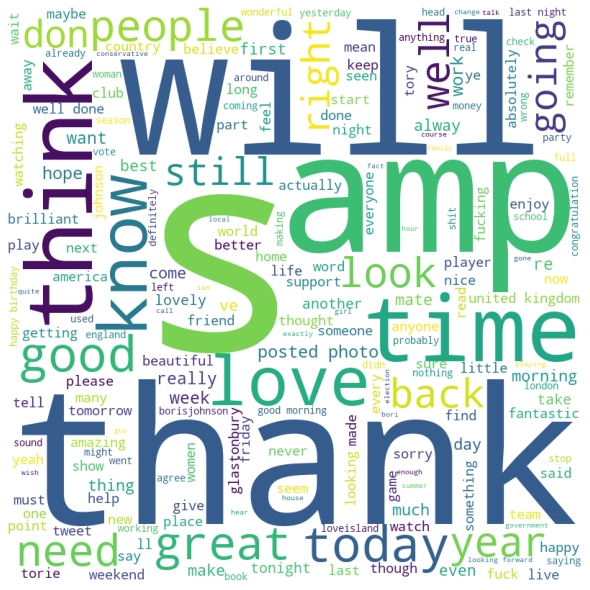

In [170]:
generate_word_cloud(UK_tweets[23])

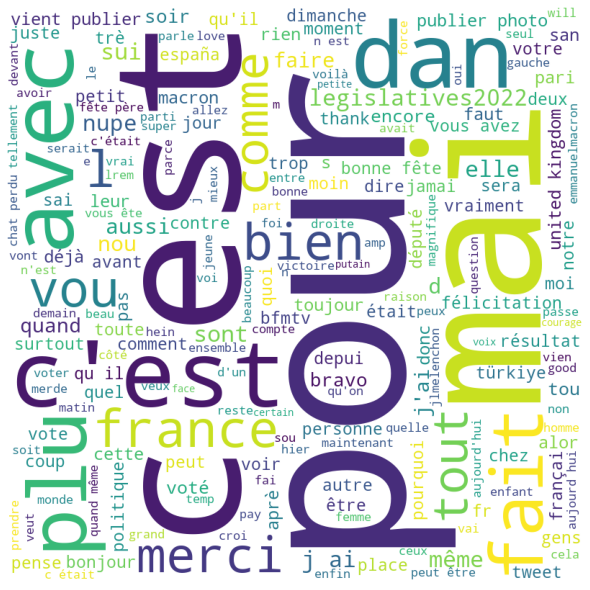

In [171]:
generate_word_cloud(FR_tweets[18])

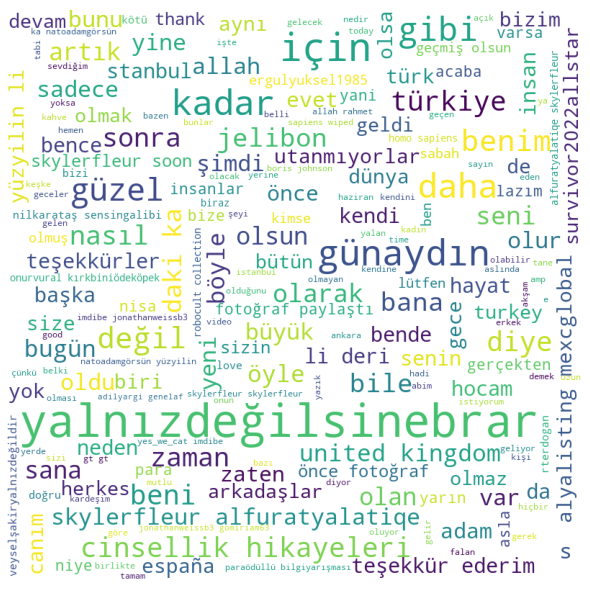

In [169]:
generate_word_cloud(TK_tweets[28])